In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
import copy

In [2]:
def k_means_clustering(img, k, max_iter, convergence_criterion, show_progress=False):
    (m, n, numchannels) = img.shape

    centroid_idx = (m*n*np.random.rand(1,k)).astype(int)
    centroid_idx = centroid_idx.reshape(-1,1)

    row = centroid_idx // n
    column = centroid_idx % n

    centroids= np.zeros([k,numchannels])
    for c in range(k):
        x  = img[int( row[c] )][int( column[c] )] 
        centroids[c] = x

    iternum = change = 0
    chosencent = (np.zeros([m,n])).astype(int)
    old_centroids = centroids
    change = math.inf
    
    # now iterate until centroids converge
    while (iternum < max_iter) and ( change > convergence_criterion): 
            # find closest centroids
        if show_progress:
            print( 'iteration number: {}, change in centroids = {}'.format(iternum, change) )
        for i in range(m):
            for j in range(n):
                distances = []
                thispoint = img[i,j,:]
                for c in range(k): #loop over centroids                
                    # compute 2-norm distance between thispoint and cent
                    dist = np.linalg.norm(old_centroids[c]-thispoint) 
                    distances.append(dist)

                chosencent[i][j] = np.argmin(distances) # chosen for the pixel


        new_centroids = np.zeros([k,numchannels])
        for c in range(k):
            new_centroid =  np.zeros([1, numchannels])
            popul = 0
            for i in range(m):
                for j in range(n):
                    if chosencent[i][j]==c:
                        new_centroid += img[i][j]
                        popul += 1
            new_centroids[c] = new_centroid.astype(float) / popul

        change = np.linalg.norm( old_centroids - new_centroids, 'fro') #how much has one iteration changed the centroids 
        old_centroids = new_centroids
        iternum += 1
    
    new_centroids = new_centroids.astype(int)
    
    # now, assign each pixel to the closest new_centroid (the final ones)
    output_img = copy.copy(img)
    for i in range(m):
            for j in range(n):
                output_img[i,j,:] = new_centroids[ chosencent[i][j] ]
                
    return output_img

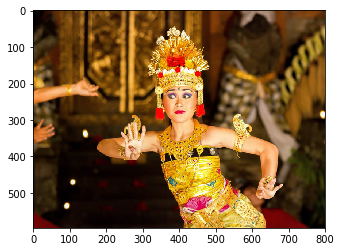

In [3]:
# filename='data/Ulun-Danu.jpg'
# filename='data/Serene-Sunset.jpg'
filename='data/Bali-Dancer.jpg'
# img = cv2.imread(filename)
img=mpimg.imread(filename)
plt.imshow(img)

iteration number: 0, change in centroids = inf
iteration number: 1, change in centroids = 83.61405194474483
iteration number: 2, change in centroids = 43.53667933158564
iteration number: 3, change in centroids = 24.757105817414374
iteration number: 4, change in centroids = 15.77874774362516
iteration number: 5, change in centroids = 10.205198173571125
iteration number: 6, change in centroids = 7.095849930256144
iteration number: 7, change in centroids = 5.568424745978897
iteration number: 8, change in centroids = 5.205381898575275
iteration number: 9, change in centroids = 4.890563013264155
iteration number: 10, change in centroids = 4.5726933449282745
iteration number: 11, change in centroids = 4.3392975920823575
iteration number: 12, change in centroids = 4.0284415420278
iteration number: 13, change in centroids = 3.8214079820816393
iteration number: 14, change in centroids = 4.074060277342867
iteration number: 15, change in centroids = 4.133733584812912
iteration number: 16, change 

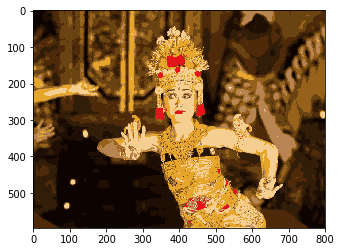

In [4]:
k, max_iter, convergence_criterion = 10, 20, 1.0
output_img = k_means_clustering(img, k, max_iter, convergence_criterion, show_progress=True)
plt.imshow(output_img)

In [8]:
def plot_original_and_compressed( filename, k, max_iter, convergence_criterion, show_progress=False ):
    img=mpimg.imread(filename)
    output_img = k_means_clustering(img, k, max_iter, convergence_criterion, show_progress=show_progress)
    fig = plt.figure(num=None, figsize=(26, 12), dpi=80, facecolor='w', edgecolor='k')
    fig.canvas.set_window_title('Window Title')

    ax1 = fig.add_subplot(121) 
    ax1.set_title('Original')
    ax1.imshow(img)

    ax2 = fig.add_subplot(122)
    ax2.set_title('Compressed')
    ax2.imshow(output_img)

    fig.suptitle('number of colors = {}'.format(k) )

iteration number: 0, change in centroids = inf
iteration number: 1, change in centroids = 88.10395761256827
iteration number: 2, change in centroids = 26.29285830250292
iteration number: 3, change in centroids = 22.818591768578752
iteration number: 4, change in centroids = 20.23705323223112


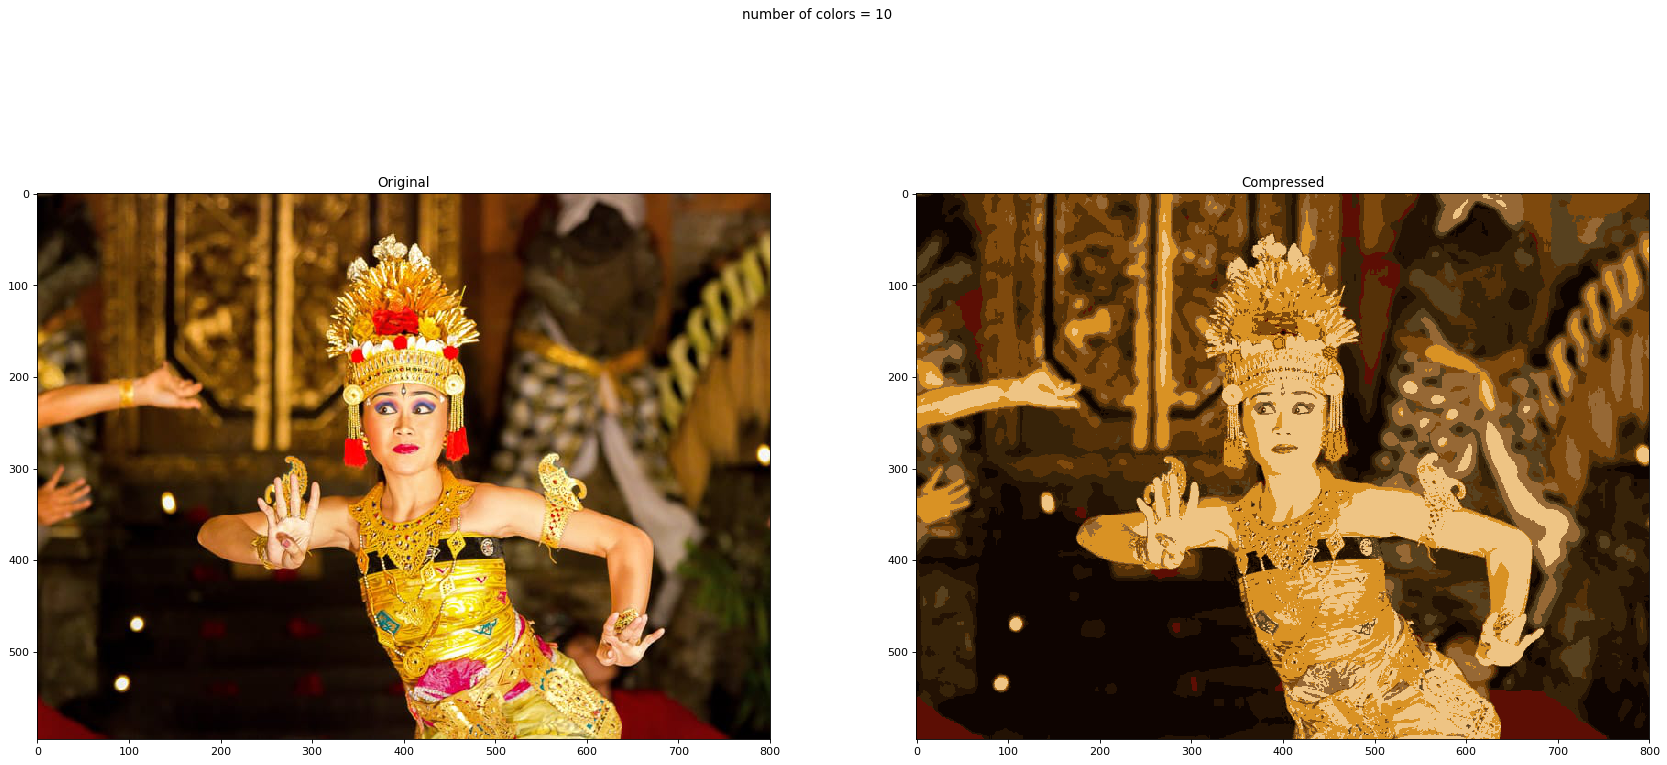

In [10]:
filename='data/Bali-Dancer.jpg'
k, max_iter, convergence_criterion = 10, 5, 4.0
plot_original_and_compressed( filename, k, max_iter, convergence_criterion)

In [ ]:
filename='data/Bali-Dancer.jpg'
k, max_iter, convergence_criterion = 5, 10, 4.0
plot_original_and_compressed( filename, k, max_iter, convergence_criterion)

iteration number: 0, change in centroids = inf


In [ ]:
filename='data/Ulun-Danu.jpg'
k, max_iter, convergence_criterion = 10, 5, 1.0
plot_original_and_compressed( filename, k, max_iter, convergence_criterion)

In [ ]:
filename='data/Serene-Sunset.jpg'
k, max_iter, convergence_criterion = 10, 5, 1.0
plot_original_and_compressed( filename, k, max_iter, convergence_criterion)

In [ ]:
filename='data/Besakih.jpg'
k, max_iter, convergence_criterion = 10, 5, 1.0
plot_original_and_compressed( filename, k, max_iter, convergence_criterion)

In [ ]:
filename='data/Bali-temple.jpg'
k, max_iter, convergence_criterion = 10, 5, 1.0
plot_original_and_compressed( filename, k, max_iter, convergence_criterion)